In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as sm

#**Tugas 01** (Keluarkan outlier atasnya)

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')

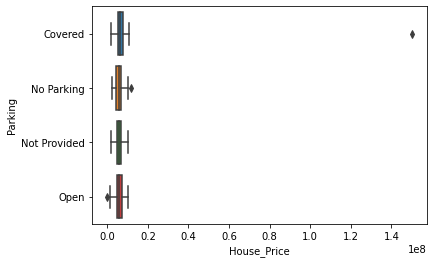

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price) #boxplot terlihat aneh maka kemungkinan besar terdapat outlier

In [ ]:
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())] #Preprocessed Data
Q1=price2["House_Price"].quantile(0.25)
Q3=price2["House_Price"].quantile(0.75)
JIQ = Q3 - Q1 #Jangkauan Inter Quartil
print("Q1 = {}, Q3 = {}, JIQ = {}".format(Q1, Q3, JIQ))

zero=0
batas_atas = Q3 + 1.5 *JIQ

x = price2['House_Price'] 
no_outliers = x.between(0,batas_atas) #mengexclude value-value yang diluar batas atas (variabel memiliki data type boolean)
outlier_index = price2[~no_outliers].index #variabel yang menyimpan index outlier
price2=price2.drop(outlier_index, inplace=False) #mengeluarkan outlier dari dataframe


Q1 = 4658000.0, Q3 = 7180500.0, JIQ = 2522500.0


In [ ]:
print(no_outliers.value_counts()) #Dari sini diketahui terdapat 1 outlier

True     930
False      1
Name: House_Price, dtype: int64


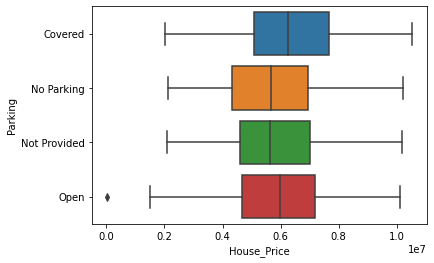

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price2) #boxplot data yang sudah di remove outliernya

#**Tugas 02** (Mengeluarkan outlier bawah dari boxplot di atas)

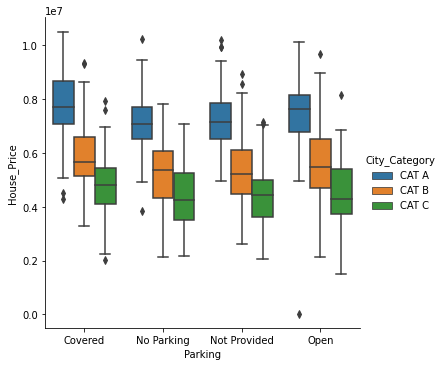

In [ ]:
p = sns.catplot(x= "Parking", y= "House_Price", hue= "City_Category", kind="box", data=price2)

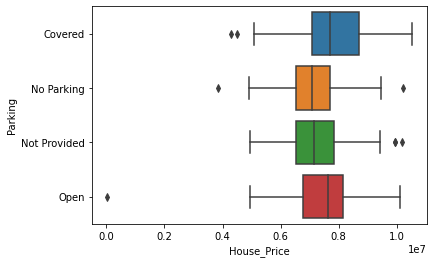

In [ ]:
CategoryA = price2[price2.City_Category == 'CAT A']
p= sns.boxplot(x= "House_Price", y="Parking", data= CategoryA)

In [ ]:
#akan dikeluarkan outliers bawah pada Category A

CategoryA_open = CategoryA[CategoryA.Parking == "Open"]
Q1aopen = CategoryA_open['House_Price'].quantile(0.25)
Q3aopen = CategoryA_open['House_Price'].quantile(0.75)
IQRaopen = Q3aopen - Q1aopen
outliers_bawahaopen = (CategoryA_open['House_Price'] < (Q1aopen - 1.5*IQRaopen))

CategoryA_nopark = CategoryA[CategoryA.Parking == "No Parking"]
Q1anopark = CategoryA_nopark['House_Price'].quantile(0.25)
Q3anopark = CategoryA_nopark['House_Price'].quantile(0.75)
IQRanopark = Q3anopark - Q1anopark
outliers_bawahanopark = (CategoryA_nopark['House_Price'] < (Q1anopark - 1.5*IQRanopark))

CategoryA_covered = CategoryA[CategoryA.Parking == "Covered"]
Q1acov = CategoryA_covered['House_Price'].quantile(0.25)
Q3acov = CategoryA_covered['House_Price'].quantile(0.75)
IQRacov = Q3acov - Q1acov
outliers_bawahacov = (CategoryA_covered['House_Price'] < (Q1acov - 1.5*IQRacov))


In [ ]:
CategoryA_open[outliers_bawahaopen].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [ ]:
CategoryA_nopark[outliers_bawahanopark].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000


In [ ]:
CategoryA_covered.loc[outliers_bawahacov].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
320,11240.0,9781.0,15232.0,1523.0,1813.0,Covered,CAT A,520,4496000
875,9997.0,12349.0,13043.0,1350.0,1606.0,Covered,CAT A,770,4303000


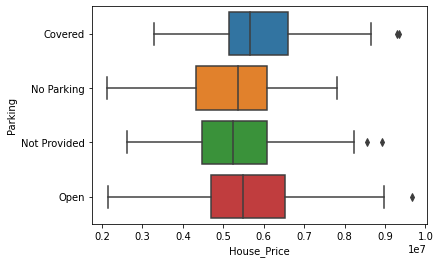

In [ ]:
CategoryB = price2[price2.City_Category == 'CAT B']
p= sns.boxplot(x = "House_Price", y ="Parking", data = CategoryB)

Tidak ada outlier bawah pada Category B

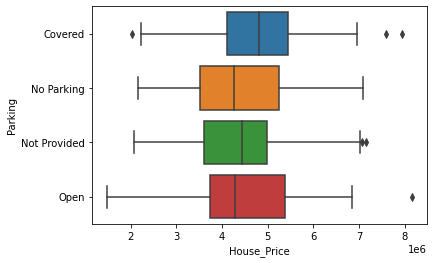

In [ ]:
CategoryC = price2[price2.City_Category == 'CAT C']
p= sns.boxplot(x = "House_Price", y ="Parking", data = CategoryC)

In [ ]:
#akan dikeluarkan outliers bawah pada Category C

CategoryC_covered = CategoryC[CategoryC.Parking == "Covered"]
Q1ccov = CategoryC_covered['House_Price'].quantile(0.25)
Q3ccov = CategoryC_covered['House_Price'].quantile(0.75)
IQRccov = Q3ccov - Q1ccov
outliers_bawahccov = (CategoryC_covered['House_Price'] < (Q1ccov - 1.5*IQRccov))

In [ ]:
CategoryC_covered.loc[outliers_bawahccov].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
622,4619.0,10768.0,11787.0,1624.0,1946.0,Covered,CAT C,870,2027000


#**Tugas 03**

In [ ]:
tips = pd.read_csv('tips.csv',sep=',')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###1. Adakah tipe variabel yang kurang tepat?

In [ ]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Pada 'day' dan 'time', tertulis bahwa tipe variabelnya berupa object, seharusnya keduanya merupakan datetime64



###2. Apakah data numeriknya cenderung berdistribusi normal?

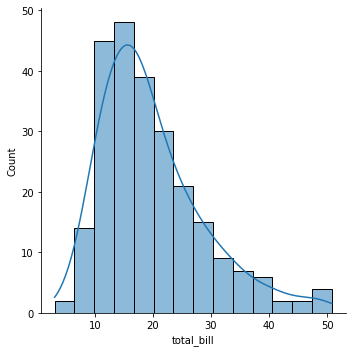

In [ ]:
col = 'total_bill'
plot = sns.displot(data=tips, x=col, kde=True)

In [ ]:
tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

Dari plot tersebut, terlihat bahwa puncak datanya bukan berada pada nilai rata-rata dari total_bill sehingga kurvanya tidak simetris pada garis vertikal rata-rata. Maka dari itu, data tersebut tidak berdistribusi normal

###3. Apakah ada outlier, noise, missing values, dan/atau duplikasi data?

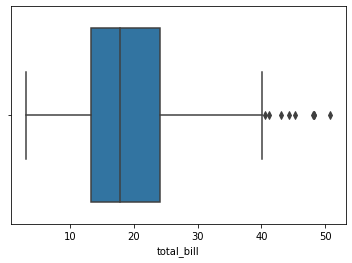

In [ ]:
#mencari outlier
sns.boxplot(x=tips['total_bill'])

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
#mencari missing value
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
#mencari duplikasi data
tips.duplicated().sum()

1

Pada data tersebut, terlihat bahwa:
- terdapat outlier
- tidak terdapat noise
- tidak terdapat missing value
- terdapat duplikasi data

###4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

In [ ]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Dari hasil tersebut, terlihat bahwa jumlah pelanggan pria hampir 2 kali lebih banyak daripada pelanggan wanita. Oleh karena itu, jumlah pelanggan pria dan wanita tidak proporsional

###5. Dari data yang ada apakah Pria atau Wanita ada kecenderungan memberi tips lebih besar?



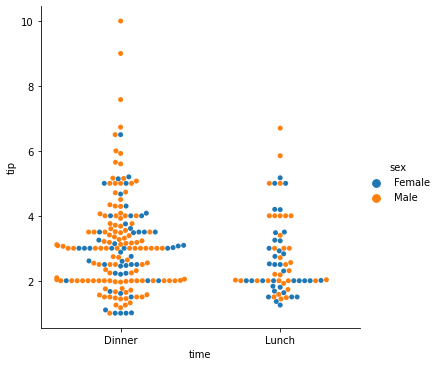

In [ ]:
sns.catplot(x="time", y="tip", hue="sex", kind="swarm", data=tips)

Berdasarkan grafik di atas, terlihat bahwa tidak adanya kecenderungan baik pria maupun wanita memberi tips yang lebih besar

### 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

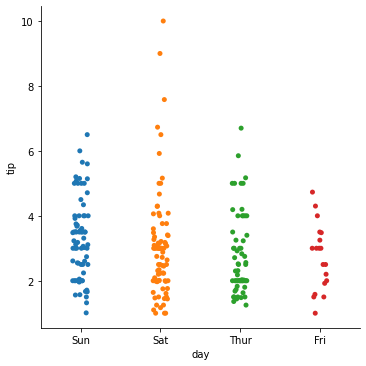

In [ ]:
sns.catplot(x="day", y="tip", data=tips)

Dari grafik di atas, terlihat bahwa tidak adanya kecenderungan tips lebih besar pada hari-hari tertentu

###7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

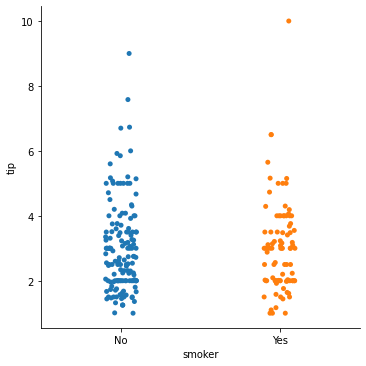

In [ ]:
sns.catplot(x="smoker", y="tip", data=tips)

Berdasarkan grafik di atas, tidak ada hubungan antara customer perokok dengan besar tips yang diberikan

###8. Apakah pola di nomor 5 dan 7 dipengaruhi hari ?


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


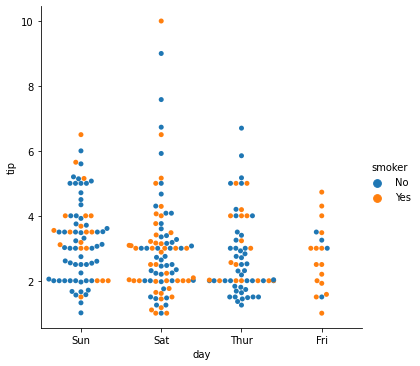

In [ ]:
sns.catplot(x="day", y="tip", hue="smoker", kind="swarm", data=tips)

Berdasarkan grafik, perbedaan hari tidak berpengaruh

### 9. Pola apalagi yang dapat anda temukan?

Dari data yang didapat, kami melihat bahwa pelanggan lebih banyak berdatangan secara berpasangan, maka dari itu disarankan agar membuat tata meja dan kursi untuk bersama.

### 10. Dari hasil EDA anda saran apa saja yang akan anda berikan kepada pemilik  restoran?

Menurut kami, dari data yang sudah di proses, kami menyarankan agar restoran memperbanyak pegawai wanita karena jumlah pelanggan pria lebih banyak dibanding pelanggan wanita dan memperbanyak pegawai  pada hari sabtu dan minggu karena pada data, terlihat saat weekend lebih padat dari hari kamis dan jumat. Kami juga menyarankan restoran agar memperbanyak tempat duduk di dalam ruangan karena lebih banyak pelanggan yang tidak merokok.